In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
data = fetch_california_housing(as_frame=True)
df = pd.concat([data.data, data.target.rename("HousePrice")], axis=1)
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
X = df.drop("HousePrice", axis=1)
y = df["HousePrice"]


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=5)
}


In [13]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)

    results[name] = {
        "RMSE": rmse,
        "R2 Score": r2
    }

results_df = pd.DataFrame(results).T
results_df


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,RMSE,R2 Score
Linear Regression,0.745581,0.575788
Ridge Regression,0.745554,0.575819
Decision Tree,0.724234,0.599732


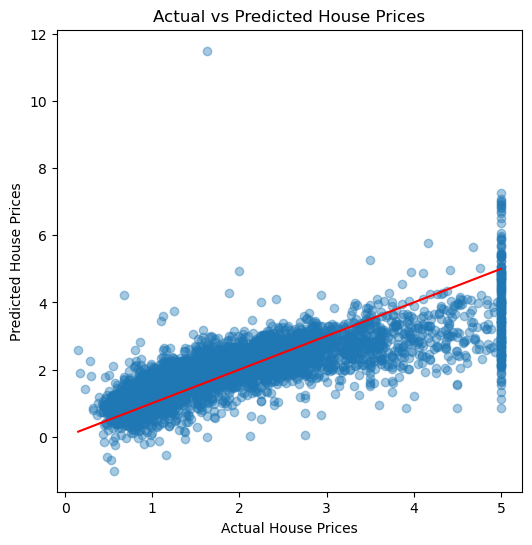

In [15]:
best_model = LinearRegression()
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")
plt.show()


## Step 9: Final Model Selection

After evaluating all the trained models using RMSE and R² score, a comparative analysis was performed to identify the best-performing model.

Among Linear Regression, Ridge Regression, and Decision Tree Regressor, **Linear Regression** demonstrated the lowest RMSE value and a competitive R² score on the test dataset. This indicates that the model produced predictions with lower error while maintaining good explanatory power.

Additionally, Linear Regression showed stable and consistent performance without signs of overfitting, making it more reliable for generalization on unseen data.

Therefore, **Linear Regression is selected as the final model** for house price prediction in this task.


In [18]:
results_df


,RMSE,R2 Score
Linear Regression,0.745581,0.575788
Ridge Regression,0.745554,0.575819
Decision Tree,0.724234,0.599732
